# GAN (Generative Adversarial Network)

이번에는 GAN(Generative Adversarial Network: 생성적 적대 신경망)에 대해 알아보도록 하겠습니다.

GAN의 사전적 의미는 생성모델과 판별모델이 서로 경쟁하면서 실제와 가까운 이미지, 동영상, 음성 등을 자동으로 만들어 내는 딥러닝 방식 중 하나입니다.

2014년에 처음 제안된 이후 급격한 발전을 이루고 있는 혁신적인 기술, 실제와 매우 유사한 이미지, 동영상, 음성 등을 자동으로 생성해내는 데 있습니다.



<img src='https://images.newscientist.com/wp-content/uploads/2022/02/14174128/PRI_223554170.jpg?width=1600'>

여러분들이 보시기에 위의 얼굴 중에 실제 사람의 얼굴과 가짜 사람의 얼굴이 몇 개 있을 거 같으신가요??

정답은 ipynb 최하단에 공유 드릴테니 한 번 카운팅 해보세요.

## 1. Generative Model

우선 GAN은 Generative Model(생성 모형)으로부터 나온 방식입니다. 그럼 Generative Model이 무엇일까요?

GAN을 이해하기 위해서는 우선 Generative Model(생성 모형)에 대한 이해가 필요합니다.

Generative Model은 비지도 학습 기법에 속합니다. 비지도 학습은 레이블이 존재하지 않아 학습하는 데이터 내에 예측하고자 하는 값(y)이 없는 것이죠. 쉽게 말해서 많은 피처 X(독립변수)들을 가지고 새로운 y(종속변수)를 생성하는 기법입니다.

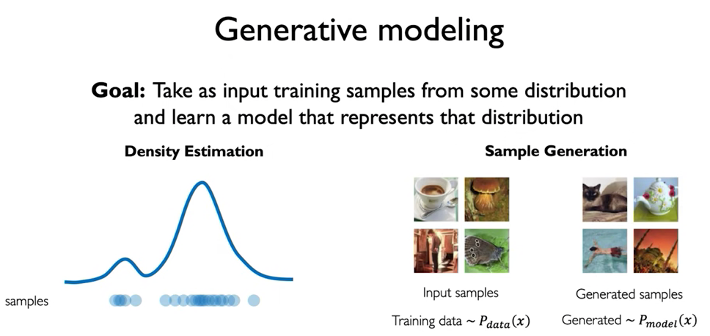

Generative Model의 주요 목표는 데이터가 추출된 분포와 최대한 유사한 분포를 학습하는 것입니다.

실제 데이터 분포($P_{data}(x)$)를 가지고 매우 유사한 새로운 확률분포$P_{model}(x)$를 가지도록 데이터를 학습시킵니다.

생성 모형의 목표는 $P_{model}(x)$가 최대한 실제 데이터와 유사한 결과가 나올 수 있도록 하는 것이죠!

## 2. Latent Variable

이러한 유사한 확률 분포를 학습하기 위해 사용되는 핵심 개념이 바로 '잠재 변수(Latent Variable)'입니다.

잠재변수는 이름에서도 알 수 있듯이 숨겨진 변수로써 데이터에 직접 나타나진 않지만 현재 데이터 분포를 만드는 데 영향을 끼치는 변수입니다.

<img src='https://theaisummer.com/static/349375081f55f42561b9895446b31706/ee604/latent-variable-models.png'>

Generative Model은 이러한 관찰된 내용만 제공하더라도 데이터에서 숨겨진 잠재변수를 실제로 학습할 수 있습니다. 다차원 데이터 세트를 처리하고 비선형 함수를 조합하여 학습을 시킨다는 것이죠! 따라서 어떤 데이터의 잠재 변수를 알아내면, 이를 이용하여 유사한 데이터를 생성해 낼 수 있습니다.

<img src='https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-030-93158-2_4/MediaObjects/524333_1_En_4_Fig1_HTML.png'>

이해를 돕기 위해 자율주행 예시를 한번 살펴볼까요?

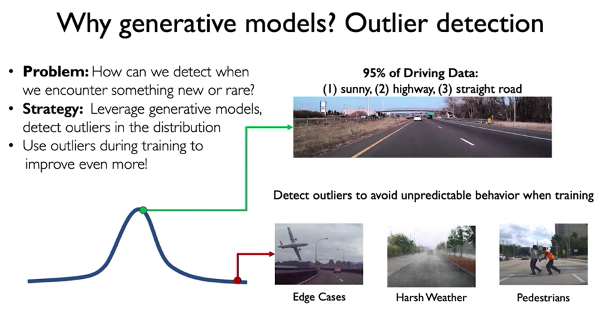

자율주행 차량이 이미지를 비디오로 인식하면서 주행하고 있다고 가정해봅시다!

이미지 데이터들이 계속 처리되면서 정상적인 주행 데이터를 대표하는 어떤 변수들이 있을 것입니다.

확률 분포를 보면 대부분의 데이터가 정상적인 주행의 상황일 것이고, 그 잠재 변수들을 통하여 정상적인 주행이라고 판단할 것입니다.

하지만 특이 상황이 나타날 때는 어떨까요? 정상적인 주행의 상황을 나타내는 잠재 변수들이 인지되지 않아 확률분포의 가장자리쪽이라 판단될 것이고, 이상치라고 탐지하게 되죠!

잠재변수의 근간이 되는 아이디어는 바로 주성분 분석(Principal Component Analysis; PCA)입니다.

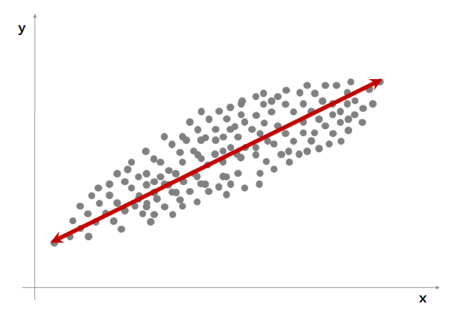

주성분 분석을 사용하면 선형 벡터의 조합으로 변수의 차원을 줄일 수 있죠.

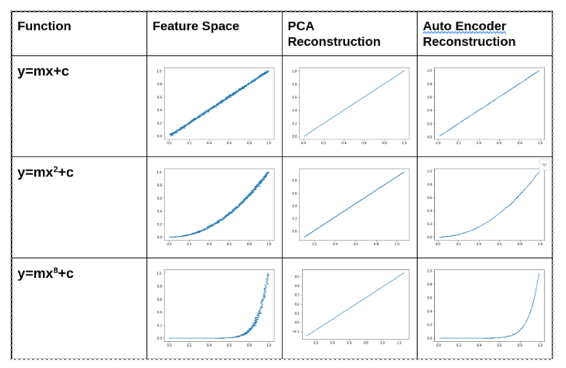

하지만 PCA는 변수의 선형적인 관계만을 표현하기 때문에, 비선형적인 관계를 표현하기 위해 딥러닝에서는 AutoEncoder를 사용합니다.

## 3. AutoEncoder


AutoEncoder에 대해 간단히 설명드리면, 실제 입력을 자체 인코딩하여 잠재변수를 구축하는 단순하고 기본적인 Generation Model입니다.

잠재 공간에 대한 레이블이 없는 unsupervised problem이므로, 데이터 자체를 label로 활용합니다.

<img src='https://cdn-images-1.medium.com/max/1200/0*yGqTBMopqHbR0fcF.'>

그래서, 원시 데이터를 입력해주면(Original input)

Encoder는 데이터를 잘 압축하는 방법을 학습하고,

Decoder는 잘 압축된 표현 방식, 즉 잠재공간(Compressed representation)을 보고

낮은 차원 잠재 공간에서 시작하여 원본 이미지를 실제로 재구성(Reconstructed input)하는 방식을 학습합니다.

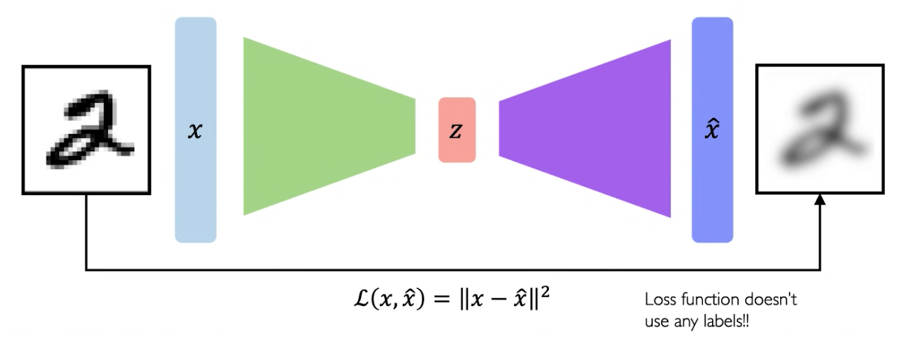

따라서 오토인코더의 손실함수는 원래 Input x와 재구성된 Output $\hat x$을 보고 단순히 둘을 비교하여, 이 두 이미지 사이 거리를 최소화(평균 제곱 오차)하는 것입니다.

## 4. Latent Space Dimension

그렇다면 잠재공간 차원은 높은 게 좋을까요? 낮은 게 좋을까요?

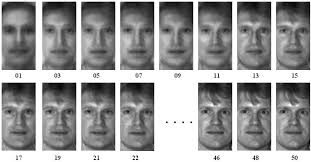

잠재 공간의 차원이 높을수록 위의 이미지처럼 50번째에 정보가 많아지지만, 오버피팅이 발생하고 해석이 어려워질 수 있습니다.

반대로 너무 낮은 잠재 공간 차원은 언더피팅이 발생하고 정보손실이 많아집니다.

따라서 적절한 잠재 공간의 차원을 신중히 결정해야 하고, 손실함수의 Loss를 낮추면서도 차원을 적절히 줄일 수 있는 아키텍처를 찾아보는 것이 중요합니다.

## 5. Generative Adversarial Network

이제 다시 GAN으로 돌아가볼까요?

사실상 데이터로부터 직접 생성과정을 학습하는 것은 어렵습니다.

따라서 실제와 유사한 가짜 데이터 생성기인 Generator를 만드는 것이죠.

Generator는 AutoEncoder의 뒷부분, Decoder 부분의 구조를 착안했다고 볼 수 있습니다.

하지만 이 구조만으로는 학습하기가 어렵겠죠?

원래 데이터의 분포를 알기 위해서 등장하는 것이 바로 Discriminator입니다.

Discriminator의 역할은 주어진 데이터가 실제 데이터인지, Generator가 생성한 데이터(가짜 데이터)인지를 구별하는 것입니다.

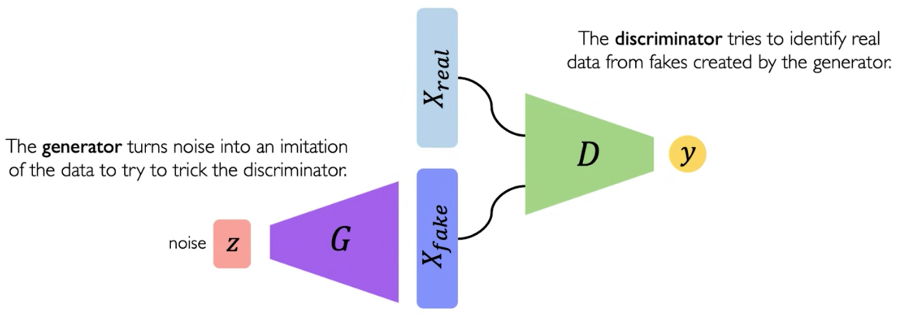

즉, GAN은 **Generator**와 **Discriminator**라는 두 개의 신경망으로 구성됩니다.

- Generator: 잠재 공간(latent space)에서 무작위한 벡터를 입력받아 가짜 이미지를 생성합니다.
- Discriminator: 이미지가 실제 데이터인지 Generator가 만든 가짜 데이터인지 판별합니다.

이 둘은 적대적인 관계로, Generator는 Discriminator를 속이기 위해 노력하고, Discriminator는 가짜 데이터를 정확히 구분하기 위해 노력합니다.

비유: GAN은 마치 위조지폐범과 경찰의 관계와 같습니다. 위조지폐범(Generator)은 진짜 지폐처럼 보이는 위조 지폐를 만들고, 경찰(Discriminator)은 이를 잡아내려고 합니다. 시간이 지날수록 위조지폐범은 더 정교한 위조 지폐를 만들고, 경찰은 더 정확한 감별 방법을 찾게 됩니다.

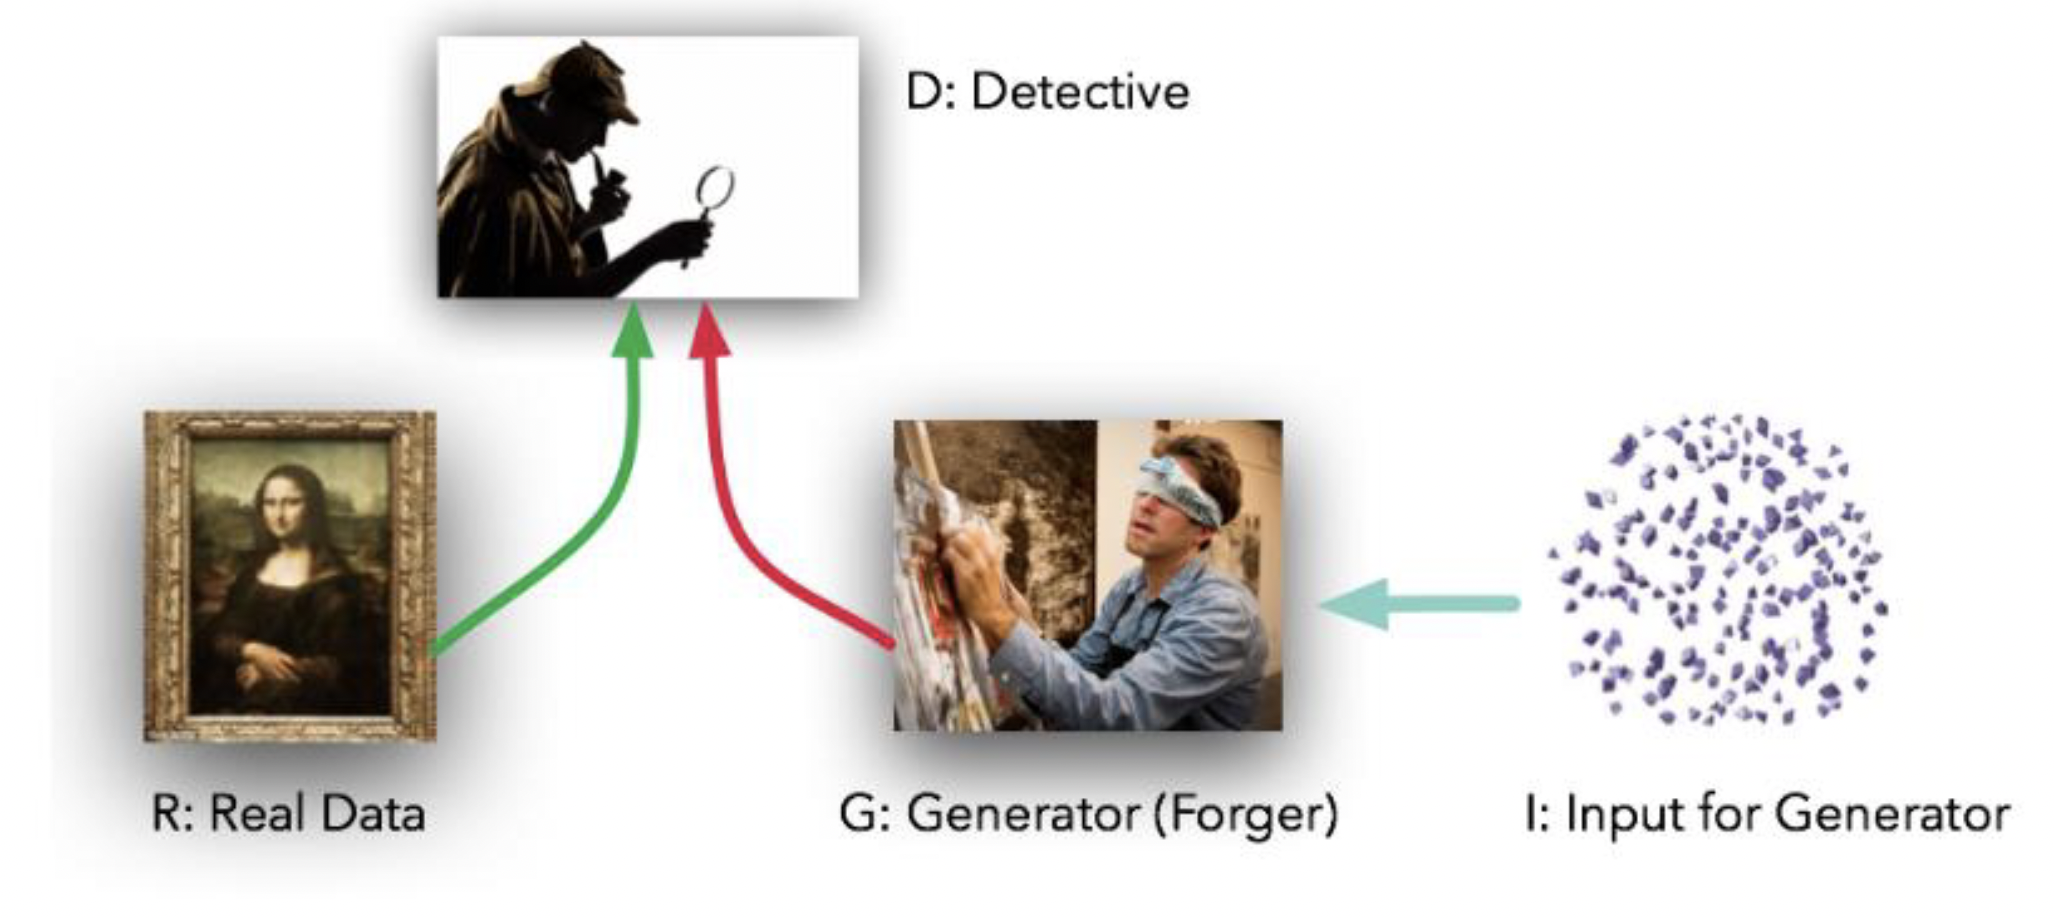

## 6. GAN의 이론적 배경


### 6.1 GAN의 수학적 정의

GAN의 목표는 Generator 분포 $p_g$가 실제 데이터 분포 $p_{data}$를 모방하도록 하는 것입니다. 이를 위해 Generator와 Discriminator는 다음의 **미니맥스 게임(minimax game)**을 수행합니다.

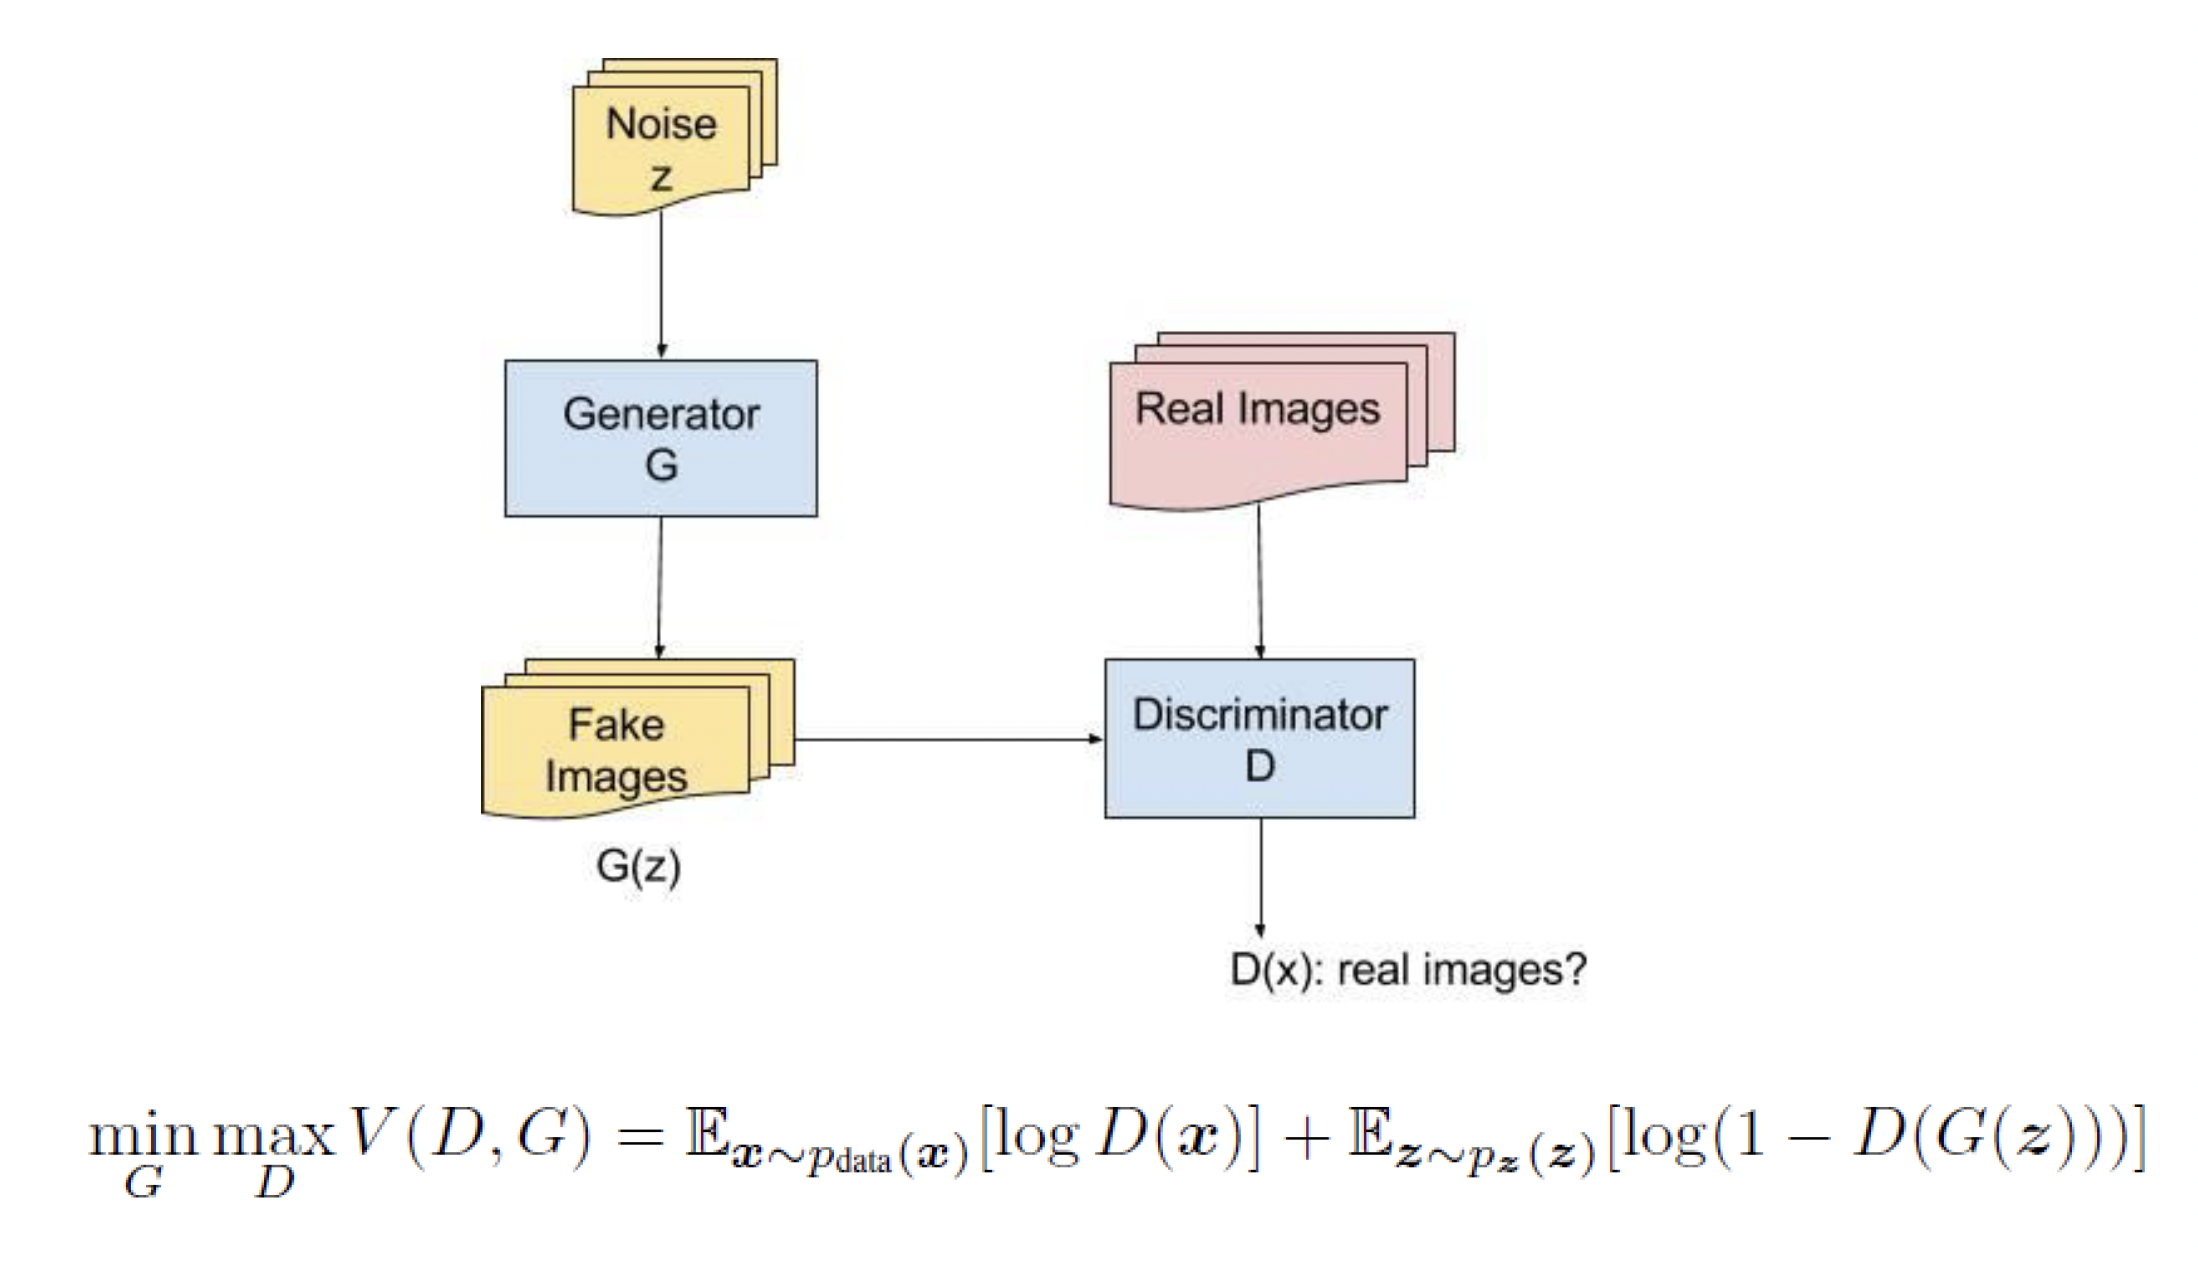

### 6.2 Generator와 Discriminator의 관계

- **Discriminator D**는 실제 데이터와 생성된 데이터를 구분하는 역할을 합니다.
- **Generator G**는 Discriminator를 속여 생성된 데이터를 실제 데이터로 분류되도록 만듭니다.

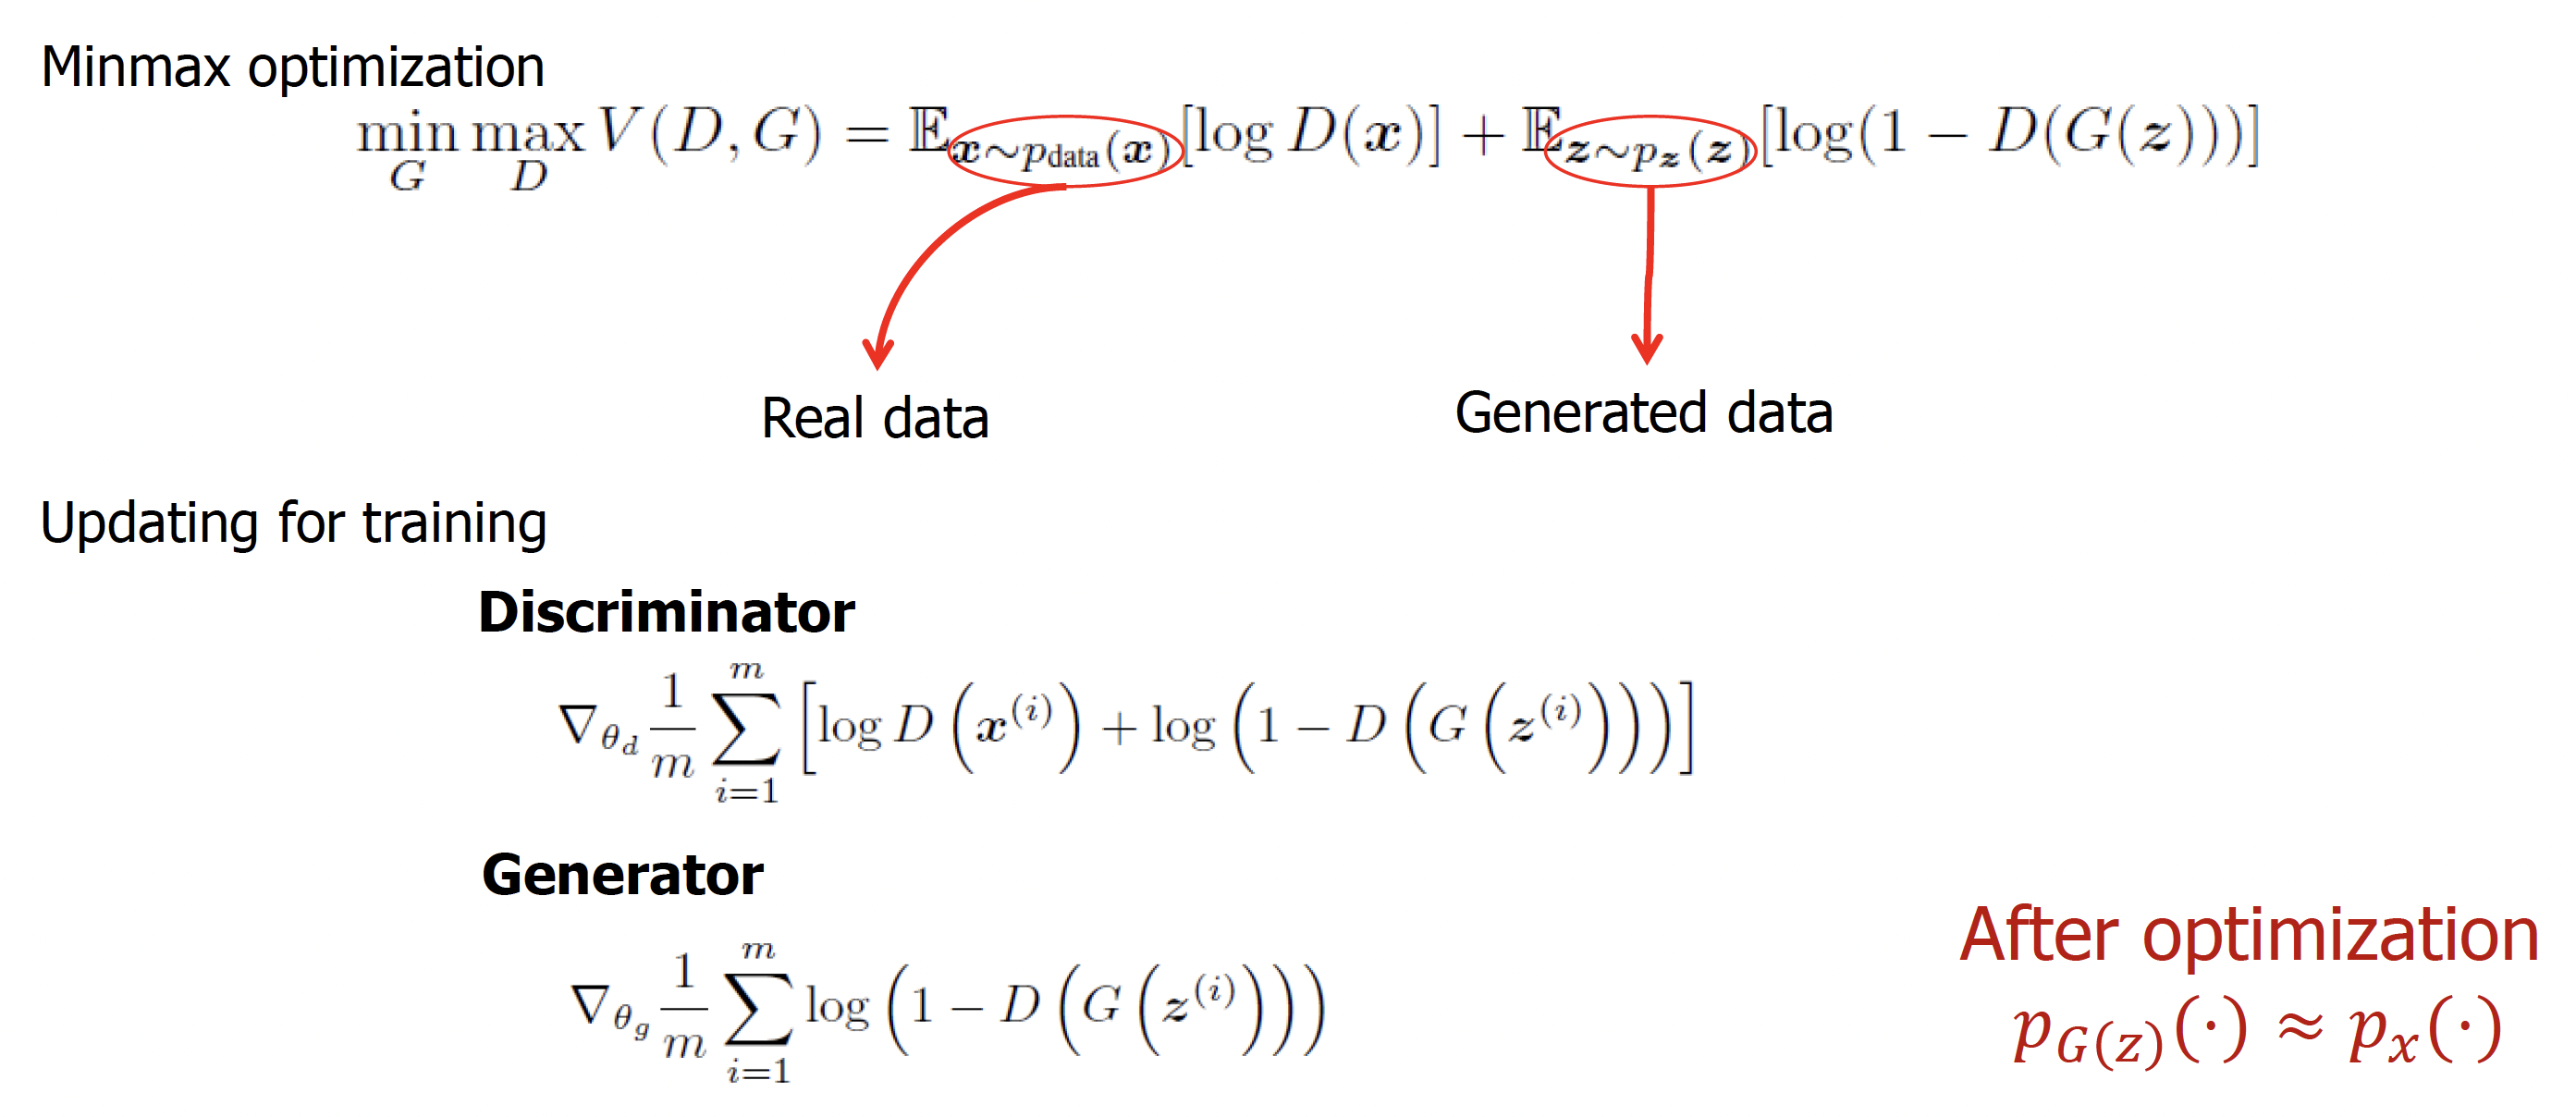

Notation

• x : 실제 데이터

• z : 노이즈 데이터 (가짜 데이터를 만드는데 사용되는)

• D(x) : Discriminator가 x를 ‘실제’인 것으로 분류할 확률

• G(z) : 주어진 z에 대하여 Generator가 만들어낸 샘플

• D(G(z)) : Generator가 만들어낸 샘플을 ‘실제’인 것으로 분류할 확률

• 1-D(G(z)) : 가짜인 것을 ‘가짜’인 것으로 분류할 확률



이진 분류에서 Cross Entropy와 비슷한 구조를 가지고 있다는 것을 보실 수 있습니다.



하지만

Discriminator의 목표는

진짜를 진짜인 것으로, 가짜는 가짜인 것으로 분류를 시켜야 되기때문에

이 손실함수를 최대화를 시키는 것이고



Generator의 목표는

Discriminator를 속이는 것이 목표이기 때문에,

가짜는 진짜인것으로, 진짜는 가짜인 것으로 분류를 시켜야 하기 때문에

이 손실함수를 최소화 시키는 것이겠죠!



따라서 두개의 함수를 동시에 매번 학습을 시키는 것 입니다.



그럼 다음 그림과 같이 정교해진 Generator를 이용하여

가짜로 생성된 데이터를 거의 실제와 같이 생성할 수 있습니다!

### 6.3 GAN의 학습 과정

- 1단계: Generator는 잠재 공간에서 샘플링한 무작위 벡터 z를 사용하여 가짜 데이터를 생성합니다.
- 2단계: Discriminator는 실제 데이터와 생성된 가짜 데이터를 입력받아 각각에 대한 진짜/가짜 확률을 출력합니다.
- 3단계: Discriminator는 실제 데이터에 대해서는 높은 확률(진짜), 생성된 데이터에 대해서는 낮은 확률(가짜)을 출력하도록 학습됩니다.
- 4단계: Generator는 Discriminator를 속이기 위해 생성된 데이터가 실제 데이터로 분류되도록 학습됩니다.

## 7. GAN의 네트워크 아키텍처

### 7.1 Generator 네트워크

- 입력: 잠재 공간에서 샘플링된 무작위 벡터z.
- 출력: 생성된 이미지 $G(z)$.
- 역할: 무작위 벡터를 실제 데이터와 유사한 이미지로 매핑.

### 7.2 Discriminator 네트워크
- 입력: 실제 이미지 또는 생성된 이미지.
- 출력: 입력 이미지가 실제일 확률.
- 역할: 입력 이미지가 실제 데이터인지 생성된 데이터인지 구분.

### 7.3 DCGAN 소개
**DCGAN(Deep Convolutional GAN)**은 GAN에 합성곱 신경망(CNN)을 도입하여 이미지 생성을 개선한 모델입니다.

- Generator: ConvTranspose2d(Transpose Convolution)를 사용하여 이미지를 업샘플링.
- Discriminator: Conv2d를 사용하여 이미지를 다운샘플링.


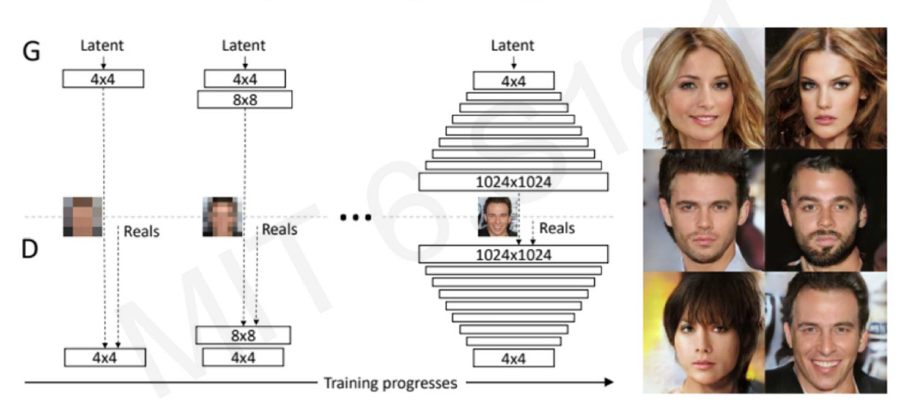

이렇게 GAN의 기본 개념부터 실제 구현까지 단계적으로 이해해보았습니다. 어떠신가요? GAN에 대해 조금 더 이해가 되셨나요? 😊

정리해보자면,

### 0. GAN(Generative Adversarial Network)이란?

생성모델과 판별모델이 경쟁하면서 실제와 가까운 이미지, 동영상, 음성 등을 자동으로 만들어 내는 딥러닝 방식중 하나입니다.

대표적인 특징

- Unsupervised Learning(비지도학습)의 대표적인 알고리즘
- 서로 대립하는 역할의 두 모델을 생성해, 적대적 경쟁시키면서 발전해 학습하는 방법
- 이미지, 음성, sequential data 등 원하는 형태의 데이터를 만드는 모델
- Generator : 생성자, 가짜 이미지 생성
- Discriminator : 판별자, 이미지의 진위 여부 판별


### 1. 필요한 라이브러리 import & Data Loader

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import imageio

# 결과 저장을 위한 디렉토리 생성
os.makedirs('images', exist_ok=True)
os.makedirs('training_progress', exist_ok=True)

# 장치 설정 (GPU 사용 가능 시 GPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# 하이퍼파라미터 설정
latent_dim = 100  # 잠재 공간의 차원
batch_size = 512
learning_rate = 0.0002
epochs = 50

In [ ]:
# 데이터 변환 (이미지를 -1 ~ 1 범위로 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# MNIST 데이터셋 로드
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 492kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.56MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



데이터셋 크기: 60000
이미지 shape: torch.Size([1, 28, 28])


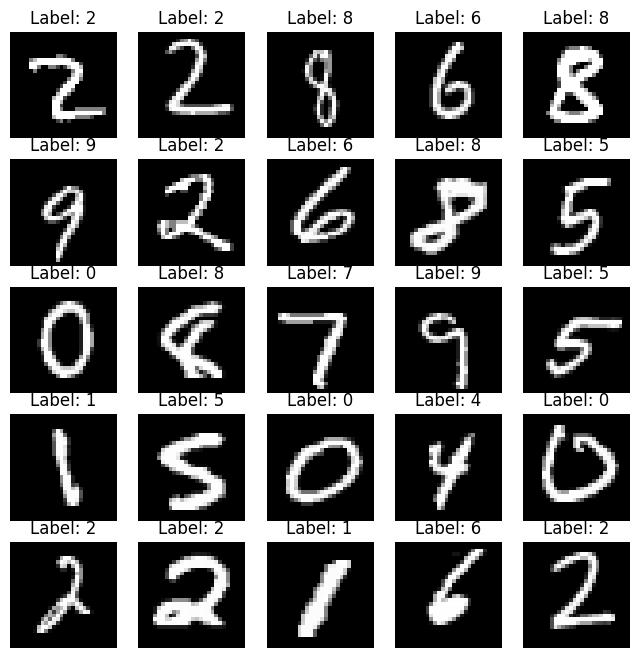

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋의 크기 확인
print("데이터셋 크기:", len(dataset))

# 첫 번째 배치의 데이터 확인
images, labels = next(iter(dataloader))

# 이미지의 shape 확인
print("이미지 shape:", images[0].shape)

# 이미지 시각화
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].squeeze().numpy(), cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.show()

### 2. Generator와 Discriminator 정의

In [ ]:
# Generator 정의
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.init_size = 7  # 이미지 크기를 28x28로 만들기 위한 초기 크기
        self.l1 = nn.Sequential(nn.Linear(latent_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),  # 7x7 -> 14x14
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Upsample(scale_factor=2),  # 14x14 -> 28x28
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 1, 3, stride=1, padding=1),
            nn.Tanh()  # 출력값을 -1 ~ 1로 스케일링
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)  # 배치 크기 맞추기
        img = self.conv_blocks(out)
        return img

#### Generator

- 역할: 랜덤한 노이즈 벡터를 입력 받아 가짜 이미지를 생성합니다.

- 구성 요소
    - Linear 층: 노이즈 벡터를 고차원 벡터로 변환합니다.
    - BatchNorm2d 및 LeakyReLU: 학습 안정화 및 비선형성 부여.
    - Upsample과 Conv2d 층: 이미지의 공간적 크기를 늘리고 특징을 추출합니다.
    - 마지막 Conv2d와 Tanh: 최종 이미지를 -1 ~ 1 범위로 출력.


In [ ]:
# Discriminator 정의
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(1, 16, 3, 2, 1),  # 28x28 -> 14x14
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),

            nn.Conv2d(16, 32, 3, 2, 1),  # 14x14 -> 7x7
            nn.ZeroPad2d((0, 1, 0, 1)),  # 크기 보정
            nn.BatchNorm2d(32, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),

            nn.Conv2d(32, 64, 3, 2, 1),  # 7x7 -> 4x4
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),

            nn.Conv2d(64, 128, 3, 1, 0),  # 4x4 -> 2x2
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
        )

        # 출력층
        self.adv_layer = nn.Sequential(
            nn.Linear(128 * 2 * 2, 1),
            nn.Sigmoid()  # 이진 분류를 위한 시그모이드 활성화 함수
        )

    def forward(self, img):
        out = self.model(img)
        out = out.view(out.shape[0], -1)  # 평탄화
        validity = self.adv_layer(out)
        return validity

#### Discriminator

- 역할: 입력된 이미지가 진짜인지 가짜인지 판별합니다.

- 구성 요소
    - 여러 개의 Conv2d 층: 이미지에서 특징을 추출하며 점진적으로 크기를 줄입니다.
    - LeakyReLU와 Dropout: 활성화 함수와 과적합 방지를 위한 드롭아웃.
    - 출력층: 최종적으로 시그모이드 함수를 통해 진짜 또는 가짜 확률을 출력.


In [ ]:
# 모델 초기화
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

# Generator 요약
summary(generator, input_size=(batch_size, latent_dim))

Layer (type:depth-idx)                   Output Shape              Param #
Generator                                [256, 1, 28, 28]          --
├─Sequential: 1-1                        [256, 6272]               --
│    └─Linear: 2-1                       [256, 6272]               633,472
├─Sequential: 1-2                        [256, 1, 28, 28]          --
│    └─BatchNorm2d: 2-2                  [256, 128, 7, 7]          256
│    └─Upsample: 2-3                     [256, 128, 14, 14]        --
│    └─Conv2d: 2-4                       [256, 128, 14, 14]        147,584
│    └─BatchNorm2d: 2-5                  [256, 128, 14, 14]        256
│    └─LeakyReLU: 2-6                    [256, 128, 14, 14]        --
│    └─Upsample: 2-7                     [256, 128, 28, 28]        --
│    └─Conv2d: 2-8                       [256, 64, 28, 28]         73,792
│    └─BatchNorm2d: 2-9                  [256, 64, 28, 28]         128
│    └─LeakyReLU: 2-10                   [256, 64, 28, 28]         -

In [ ]:
# Discriminator 요약
summary(discriminator, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Discriminator                            [256, 1]                  --
├─Sequential: 1-1                        [256, 128, 2, 2]          --
│    └─Conv2d: 2-1                       [256, 16, 14, 14]         160
│    └─LeakyReLU: 2-2                    [256, 16, 14, 14]         --
│    └─Dropout2d: 2-3                    [256, 16, 14, 14]         --
│    └─Conv2d: 2-4                       [256, 32, 7, 7]           4,640
│    └─ZeroPad2d: 2-5                    [256, 32, 8, 8]           --
│    └─BatchNorm2d: 2-6                  [256, 32, 8, 8]           64
│    └─LeakyReLU: 2-7                    [256, 32, 8, 8]           --
│    └─Dropout2d: 2-8                    [256, 32, 8, 8]           --
│    └─Conv2d: 2-9                       [256, 64, 4, 4]           18,496
│    └─BatchNorm2d: 2-10                 [256, 64, 4, 4]           128
│    └─LeakyReLU: 2-11                   [256, 64, 4, 4]           --
│    └

### 3. GAN 학습

In [ ]:
# 손실 함수 정의
adversarial_loss = nn.BCELoss()

# 옵티마이저 설정 (논문에서 제안한 betas 사용)
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

- 손실 함수: BCELoss를 사용하여 이진 분류 손실을 계산합니다.
- 옵티마이저: Adam 옵티마이저를 사용하며, 논문에서 제안된 betas 값을 사용합니다.


#### Adam 옵티마이저의 betas 이해하기

Adam 옵티마이저는 딥러닝 모델 학습에 널리 사용되는 1차 확률적 최적화 알고리즘입니다. Adam은 momentum과 RMSprop의 장점을 결합하여, gradient의 1차 모멘트(평균)와 2차 모멘트(비편향 분산)를 모두 활용합니다. 이때, betas는 모멘트 추정에 사용되는 지수 가중 이동 평균(EWMA)의 감쇠율을 제어하는 하이퍼파라미터입니다.

betas = (beta_1, beta_2)는 다음과 같이 작동합니다.

1. beta_1: gradient의 1차 모멘트(momentum)에 대한 감쇠율입니다.
    - 높은 beta_1 값 (예: 0.9)은 이전 gradient의 영향을 크게 반영하여, momentum 효과를 강조합니다.
    - 이는 학습 과정의 관성을 증가시켜, local minima를 벗어나거나 saddle point를 빠르게 통과하는 데 도움을 줄 수 있습니다.
    - 하지만, 최적해 근처에서 진동이 발생하여 수렴 속도가 느려질 수도 있습니다.

2. beta_2: gradient의 2차 모멘트(비편향 분산)에 대한 감쇠율입니다.
    - 높은 beta_2 값 (예: 0.999)은 이전 gradient 제곱의 영향을 크게 반영하여, RMSprop과 유사하게 학습률을 adaptive하게 조정합니다.
    - gradient가 큰 차원에서는 학습률을 낮추고, gradient가 작은 차원에서는 학습률을 높여 각 차원에 맞는 학습 속도를 제공합니다.
    - 이는 학습 안정성을 높이고, noisy gradient의 영향을 줄이는 데 효과적입니다.

#### 코드에서 betas=(0.5, 0.999)로 설정한 이유:

일반적으로 beta_1은 0.9, beta_2는 0.999로 설정됩니다. 그러나, 특정 모델이나 데이터셋에서는 다른 betas 값이 더 나은 성능을 보일 수 있습니다.

코드에서 사용된 (0.5, 0.999)는 해당 GAN 모델에 대해 실험적으로 최적화된 값일 가능성이 높습니다.

특히, beta_1을 0.5로 낮춘 것은 momentum 효과를 줄이고, 생성 모델의 다양성을 높이기 위한 시도일 수 있습니다.

betas 값 조정의 영향

- beta_1 감소: momentum 감소, 학습 속도 증가, 학습 불안정성 증가 가능성
- beta_1 증가: momentum 증가, 학습 속도 감소, 학습 안정성 증가, 수렴 속도 감소 가능성
- beta_2 감소: adaptive 학습률 조정 효과 감소, 학습 속도 증가, noisy gradient에 취약해질 가능성
- beta_2 증가: adaptive 학습률 조정 효과 증가, 학습 속도 감소, 학습 안정성 증가, noisy gradient에 강건해질 가능성

#### 결론

betas는 Adam 옵티마이저의 핵심 하이퍼파라미터로, 모멘트 추정을 통해 학습 과정의 방향과 속도를 제어합니다.

적절한 betas 값은 모델과 데이터셋에 따라 다르며, 실험을 통해 최적화해야 합니다.

In [ ]:
# 학습 과정 추적을 위한 리스트
g_losses = []  # Generator 손실 기록
d_losses = []  # Discriminator 손실 기록
fixed_noise = torch.randn(64, latent_dim, device=device)  # 이미지 생성용 고정 노이즈
image_paths = []  # GIF 생성을 위한 이미지 경로 리스트

# 학습 루프
print("Starting Training...")
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):
        # 데이터 준비
        batch_size = imgs.size(0)
        real_imgs = imgs.to(device)

        # 진짜/가짜 레이블 생성
        real = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # -----------------
        #  Generator 학습
        # -----------------
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim, device=device)
        gen_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(gen_imgs), real)
        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Discriminator 학습
        # ---------------------
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), real)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # 손실값 기록
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

        # 진행상황 출력
        if i % 100 == 0:
            print(
                f"[Epoch {epoch}/{epochs}] [Batch {i}/{len(dataloader)}] "
                f"[D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]"
            )

    # 에폭마다 이미지 생성 및 저장
    with torch.no_grad():
        fake_imgs = generator(fixed_noise).cpu()
        img_path = f'training_progress/epoch_{epoch+1}.png'
        torchvision.utils.save_image(fake_imgs, img_path, normalize=True, nrow=8)
        image_paths.append(img_path)

    # 손실 함수 그래프 저장
    plt.figure(figsize=(10, 5))
    plt.plot(g_losses, label='Generator Loss', alpha=0.7)
    plt.plot(d_losses, label='Discriminator Loss', alpha=0.7)
    plt.title('Training Losses')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig('training_progress/loss_plot.png')
    plt.close()

Starting Training...
[Epoch 0/50] [Batch 0/235] [D loss: 0.6941] [G loss: 0.6938]
[Epoch 0/50] [Batch 100/235] [D loss: 0.6838] [G loss: 0.6956]
[Epoch 0/50] [Batch 200/235] [D loss: 0.6777] [G loss: 0.6889]
[Epoch 1/50] [Batch 0/235] [D loss: 0.6727] [G loss: 0.6816]
[Epoch 1/50] [Batch 100/235] [D loss: 0.6892] [G loss: 0.7652]
[Epoch 1/50] [Batch 200/235] [D loss: 0.6628] [G loss: 0.6831]
[Epoch 2/50] [Batch 0/235] [D loss: 0.7023] [G loss: 0.6909]
[Epoch 2/50] [Batch 100/235] [D loss: 0.6776] [G loss: 0.7221]
[Epoch 2/50] [Batch 200/235] [D loss: 0.6520] [G loss: 0.9005]
[Epoch 3/50] [Batch 0/235] [D loss: 0.6488] [G loss: 0.8260]
[Epoch 3/50] [Batch 100/235] [D loss: 0.6558] [G loss: 0.7130]
[Epoch 3/50] [Batch 200/235] [D loss: 0.6358] [G loss: 0.8056]
[Epoch 4/50] [Batch 0/235] [D loss: 0.6973] [G loss: 0.6869]
[Epoch 4/50] [Batch 100/235] [D loss: 0.6990] [G loss: 0.7454]
[Epoch 4/50] [Batch 200/235] [D loss: 0.6311] [G loss: 0.8160]
[Epoch 5/50] [Batch 0/235] [D loss: 0.6456] 

1. Generator 학습
    - 노이즈 벡터 z를 샘플링하여 가짜 이미지 gen_imgs를 생성합니다.
    - 이 가짜 이미지를 Discriminator에 통과시켜 손실을 계산합니다.
    - Generator의 목표는 Discriminator를 속이는 것이므로, 레이블을 real로 설정합니다.
    - 역전파를 통해 Generator의 파라미터를 업데이트합니다.

2. Discriminator 학습
    - 진짜 이미지와 가짜 이미지를 모두 Discriminator에 통과시켜 손실을 계산합니다.
    - 진짜 이미지는 real 레이블, 가짜 이미지는 fake 레이블을 사용합니다.
    - 총 손실은 진짜와 가짜 이미지에 대한 손실의 평균입니다.
    - 역전파를 통해 Discriminator의 파라미터를 업데이트합니다.

3. 진행 상황 모니터링
    - 일정 배치마다 손실 값을 출력하여 학습 상황을 모니터링합니다.
    - Epoch이 끝날 때마다 현재 Generator가 생성한 이미지를 저장합니다.

### 4. 결과 해석

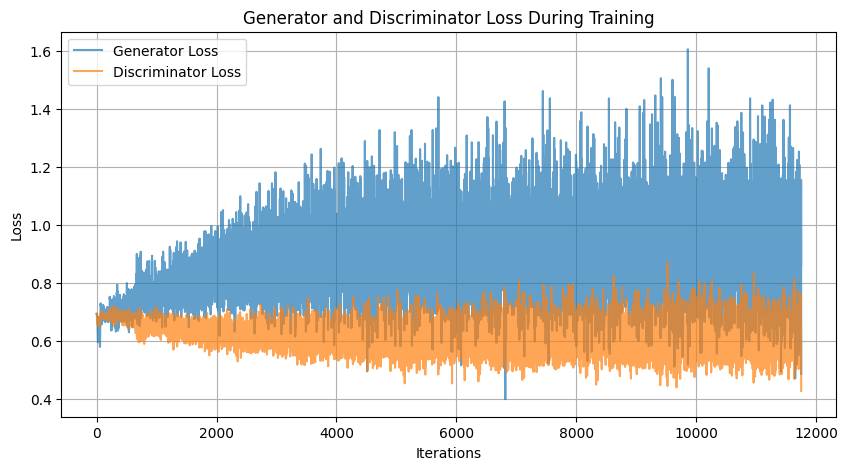

In [ ]:
# 전체 학습 과정의 손실 함수 트렌드

plt.figure(figsize=(10, 5))
plt.plot(g_losses, label='Generator Loss', alpha=0.7)
plt.plot(d_losses, label='Discriminator Loss', alpha=0.7)
plt.title('Generator and Discriminator Loss During Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 손실 함수 변화 분석
1. Discriminator Loss:

    - 초기에는 Discriminator가 진짜와 가짜를 쉽게 구분할 수 있으므로 손실이 낮습니다.
    - 학습이 진행되면서 Generator가 더 진짜 같은 이미지를 생성하므로 손실이 증가합니다.
    - 이상적으로는 Discriminator의 손실이 0.5 근처에서 안정화됩니다.

2. Generator Loss:

    - 초기에는 Generator가 무작위 노이즈에서 이미지를 생성하므로 손실이 높습니다.
    - 학습이 진행되면서 Discriminator를 속일 수 있게 되어 손실이 감소합니다.

In [ ]:
# GIF 생성
print("Creating training progress GIF...")
images = []
for path in image_paths:
    images.append(imageio.imread(path))
imageio.mimsave('training_progress/training.gif', images, duration=500)

# 최종 결과 분석
plt.figure(figsize=(15, 5))

Creating training progress GIF...


<ipython-input-13-302d11e0e3f1>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

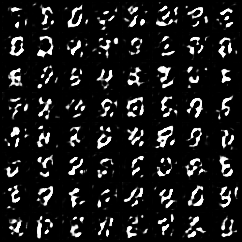

In [ ]:
# training.gif 출력
from IPython.display import Image
display(Image(filename='training_progress/training.gif'))



#### 생성된 이미지 시각화 및 평가

- 초기 Epoch
    - 생성된 이미지가 노이즈에 가깝고 의미 없는 패턴을 보입니다.
- 중반 Epoch
    - 숫자의 형태를 조금씩 띄기 시작하며, MNIST 데이터의 특징을 학습합니다.
- 후반 Epoch
    - 사람이 봐도 알아볼 수 있는 숫자 이미지가 생성됩니다.
    - 일부 이미지는 여전히 흐리거나 왜곡될 수 있습니다.

### 추가 탐구 및 실습

생성 모델에서는 한 Epoch마다 소요 시간이 어마어마합니다..

그래서, 엄밀하게 수정해서 실험하면 너무 좋지만.. 현실적으로 어려움이 있습니다..ㅠ

그래서 아래에 여러분들이 알아보시면 좋을 것들을 공유 드릴텐데 공유 드린 것들에 대해서 한 번 공부해보시고, 노션페이지에 공유해주세요.

#### 하이퍼파라미터 조정 실험

- Learning Rate

    - 학습률을 높이면 학습 속도가 빨라지지만 불안정성이 증가합니다.
    - 낮추면 안정적이지만 학습 속도가 느려집니다.

- Batch Size

    - 큰 배치 크기는 학습의 안정성을 높이지만 메모리 요구량이 증가합니다.
    - 작은 배치 크기는 노이즈가 증가하지만 일반화 능력이 향상될 수 있습니다.

- Latent Dimension:

    - Latent Space의 차원을 변경하여 Generator의 표현력을 조절할 수 있습니다.


#### 모델 아키텍처 수정 및 개선

- 추가 레이어

    - Generator와 Discriminator에 더 많은 레이어를 추가하여 모델의 깊이를 증가시킵니다.

- 활성화 함수 변경

    - ReLU, ELU 등 다른 활성화 함수를 사용하여 성능 변화를 관찰합니다.

- Normalization 기법

    - LayerNorm, InstanceNorm 등을 적용하여 학습 안정성을 개선합니다.


#### 다양한 종류의 GAN 알아보기

- Conditional GAN (cGAN)

    - 레이블 정보를 활용하여 특정 클래스의 이미지를 생성합니다.

- Wasserstein GAN (WGAN)

    - 학습 불안정성을 개선하기 위한 새로운 손실 함수를 적용합니다.

맨 위 이미지의 정답은 사실..


...


...



...

다 인공지능이 생성한 이미지 입니다!